In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df= pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 1. Cleaning 

## 1.1 Handling Nan's in the Data

In [2]:
# Let's check all columns that contain missing values and show how much of the data has nan values (in percentages)

#Create a numpy array showing the percentages of missing values for each column
missing = df.isnull().mean() 

#Create the numpy boolean filter array
np_filter_array = [True if i > 0 else False for i in missing]

#Use the filter array to only display columns that contain nan values
filtered = missing[np_filter_array]*100

#Show
filtered

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [3]:
#Categorize the columns nan values that I want to fill grouped by how to fill them
to_none = ["Alley","MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
           "GarageType", "GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
to_zero = "MasVnrArea"
to_median = "LotFrontage"
to_most_common = "Electrical"

#Change the nan column values in place 
df[to_none] = df[to_none].fillna("None")
df[to_zero]= df[to_zero].fillna(0)
df[to_median] = df[to_median].fillna(df[to_median].median())
df[to_most_common] = df[to_most_common].fillna(df[to_most_common].mode())


## 1.2 Outliers

### 1.2.1 Detecting Outliers

In [4]:
# To detect outliers, I chose to manually check all the numerical column values using the 2 methods below:

# 1. By creating a sorted view displaying the highest and lowest values 
df["LotFrontage"].sort_values()

227      21.0
1378     21.0
75       21.0
434      21.0
430      21.0
        ...  
197     174.0
231     174.0
1127    182.0
1298    313.0
934     313.0
Name: LotFrontage, Length: 1460, dtype: float64

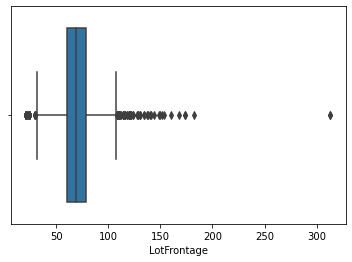

In [5]:
# 2. By graphing a boxplot:
sns.boxplot(x=df['LotFrontage'])

In [6]:
# Manually checking the columns I end up with the below columns that require further investigation
contain_outliers = ['LotFrontage', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 
                      '1stFlrSF', '2ndFlrSF', 'GrLivArea',  'GarageArea','LowQualFinSF']

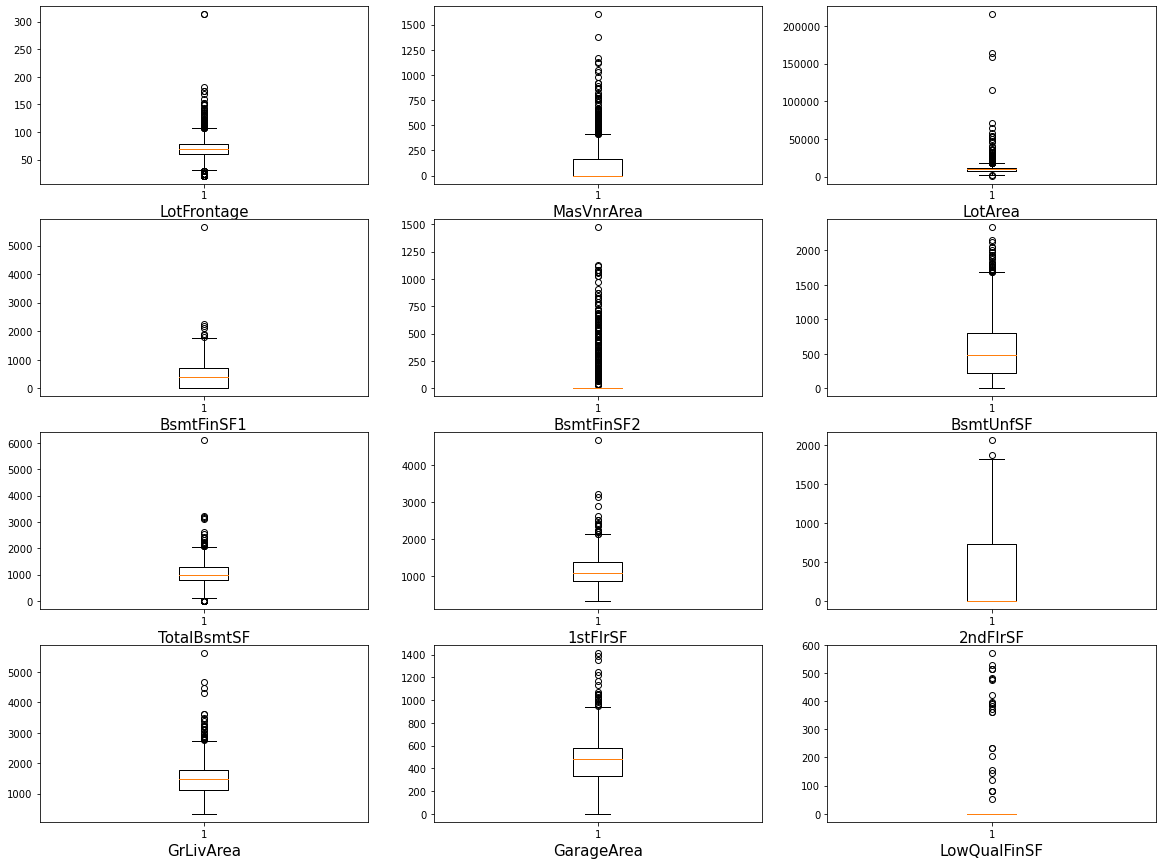

In [7]:
plt.rcParams["figure.figsize"]= (20,15)
fig, axs = plt.subplots(4,3)

for i,ax in enumerate(axs.flat):
    ax.boxplot(df[contain_outliers[i]].values)
    ax.set_xlabel(contain_outliers[i], size=15)
    ax.tick_params(axis="both", labelsize=10)
    

### 1.2.2 Handling Outliers

In [8]:
# Looking at the boxplots above I see that two cant be considered as having outliers due to the fact that 
# the vast majority of the column values are 0 (BsmtFinSF2, LowQualFinSF ) so I will leave them unchanged.

# Some others do contain outliers but they are not extremely far above the boxplot's maximum (BsmtUnfSF, 2ndFlrSF, GarageArea)
# and I therefore also did not took any action on these.

#I end up with the ones below that need changing
contain_outliers = ['LotFrontage', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

# create a new Dataframe to numerically display all the values from the columns with outliers.
col_with_outliers = pd.DataFrame()
for i in contain_outliers:
    col_with_outliers[i] = df[i].sort_values(ascending=False).values

# Display the 10 highest values for each column
col_with_outliers.head(10)

,LotFrontage,MasVnrArea,LotArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea
0,313.0,1600.0,215245,5644,6110,4692,5642
1,313.0,1378.0,164660,2260,3206,3228,4676
2,182.0,1170.0,159000,2188,3200,3138,4476
3,174.0,1129.0,115149,2096,3138,2898,4316
4,174.0,1115.0,70761,1904,3094,2633,3627
5,168.0,1047.0,63887,1880,2633,2524,3608
6,160.0,1031.0,57200,1810,2524,2515,3493
7,153.0,975.0,53504,1767,2444,2444,3447
8,152.0,922.0,53227,1721,2396,2411,3395
9,150.0,921.0,53107,1696,2392,2402,3279


In [9]:
# Looking at the numbers combined with the boxplots allows me to determine which values and how many 
# look like outliers and should be removed

#Create a dict that contains the count for each column indicating how many rows with highest values need to be deleted.
amount_to_delete = {"LotFrontage":1,"MasVnrArea":2 ,"LotArea":4,"BsmtFinSF1":1 ,"TotalBsmtSF":1 ,"1stFlrSF":1} 

In [10]:
# remove the max values from the df with the help of the dict keys and values from "Amount_to_delete"
originaldf = df.copy()
for k,v in amount_to_delete.items():
    for v in range(v):
        df.drop(df[df[k] == df[k].max() ].index, inplace=True) 

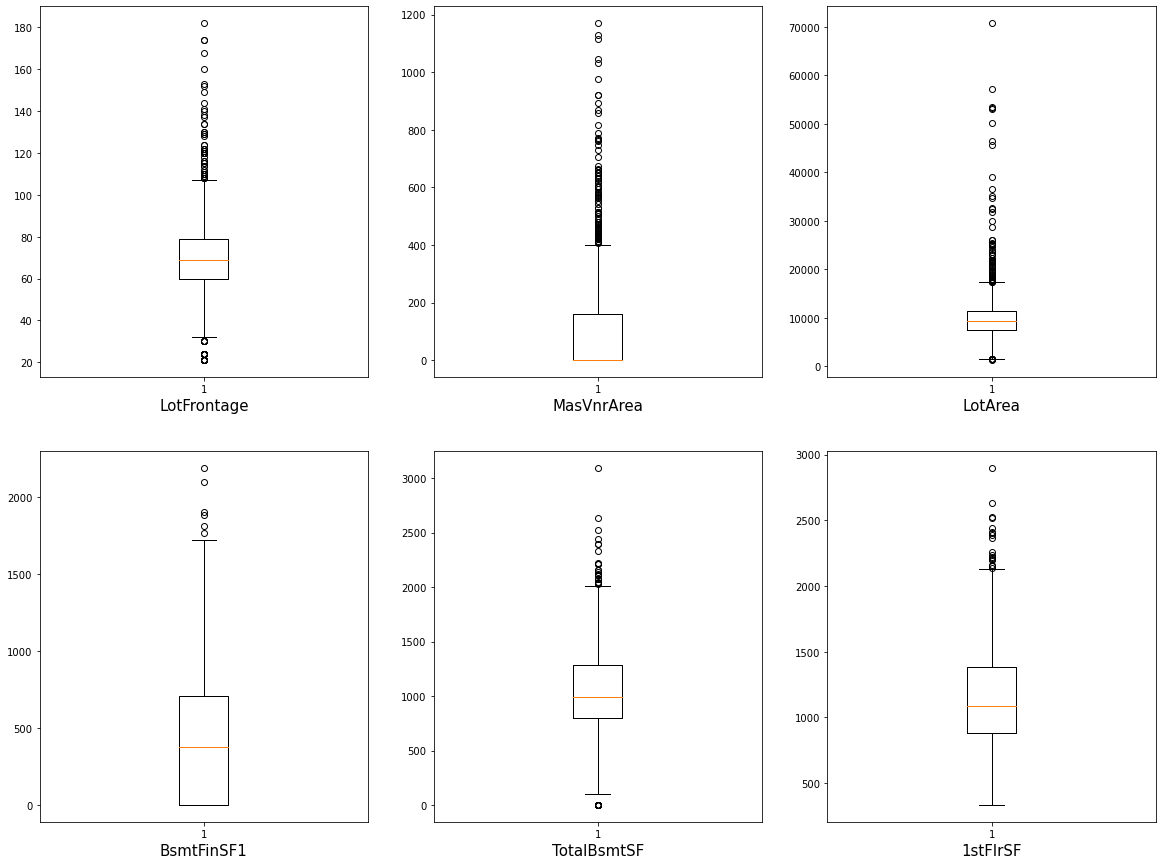

In [11]:
#Plot new boxplots with the outliers removed.
fig, axs = plt.subplots(2,3)

for i,ax in enumerate(axs.flat):
    ax.boxplot(df[col_with_outliers.columns[i]])
    ax.set_xlabel(col_with_outliers.columns[i], size=15)
    ax.tick_params(axis="both", labelsize=10)

## 2 Feature Selection 

### 2.1 Numerical Feature selection

In [12]:
df.select_dtypes(include=["float64","int64"]).columns.to_list()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
# From this list some columns can be considered categorical columns. Let's manually change the type to category for those 
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['Fence'] = df['Fence'].astype('category')
df['MiscFeature'] = df['MiscFeature'].astype('category')
# df['MiscVal'] = df['MiscVal'].astype('category')

# While the columns below can be considered categorical, using these as is will widen my dataframe dramatically 
# after one hot encoding. So I will feature engineer them into something more usable.
df[["YearRemodAdd", "GarageYrBlt", "YearBuilt", "YrSold"]]


,YearRemodAdd,GarageYrBlt,YearBuilt,YrSold
0,2003,2003.0,2003,2008
1,1976,1976.0,1976,2007
2,2002,2001.0,2001,2008
3,1970,1998.0,1915,2006
4,2000,2000.0,2000,2008
...,...,...,...,...
1455,2000,1999.0,1999,2007
1456,1988,1978.0,1978,2010
1457,2006,1941.0,1941,2010
1458,1996,1950.0,1950,2010


In [14]:
num_cols = df.select_dtypes(include=["float64","int64"]).columns.to_list()

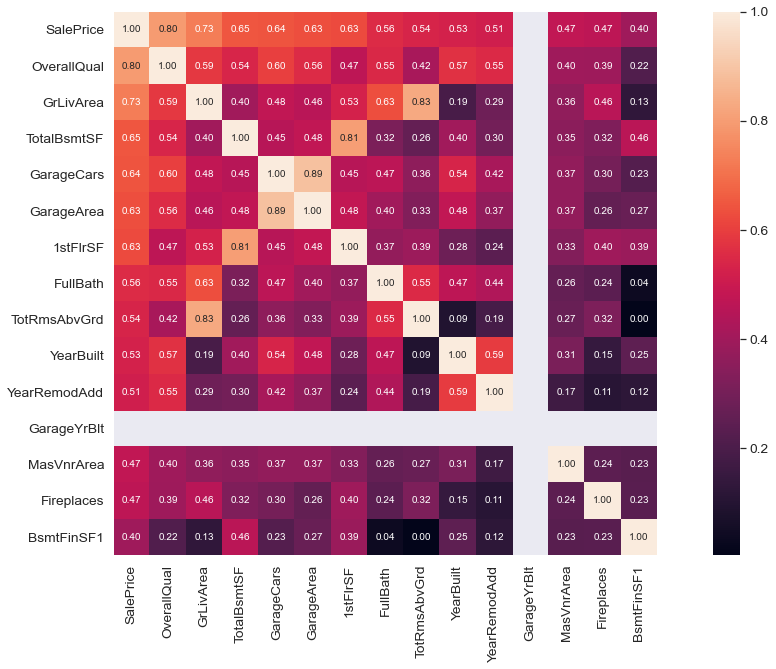

In [15]:
# I am creating a correlation matrix to display correlation of different numerical values to salesprice

corrmat = df.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
# Only check the SalePrice column from the correlation matrix
print(corrmat["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.797342
GrLivArea        0.728873
TotalBsmtSF      0.648523
GarageCars       0.644387
GarageArea       0.632571
1stFlrSF         0.626423
FullBath         0.555601
TotRmsAbvGrd     0.535146
YearBuilt        0.529246
YearRemodAdd     0.514102
GarageYrBlt      0.494848
MasVnrArea       0.474859
Fireplaces       0.468457
BsmtFinSF1       0.399472
LotArea          0.360189
LotFrontage      0.356555
OpenPorchSF      0.327041
WoodDeckSF       0.322589
2ndFlrSF         0.319357
HalfBath         0.291163
BsmtFullBath     0.219761
BsmtUnfSF        0.214203
BedroomAbvGr     0.162075
ScreenPorch      0.115441
PoolArea         0.102168
3SsnPorch        0.046838
BsmtHalfBath    -0.017941
BsmtFinSF2      -0.020167
Id              -0.020744
MiscVal         -0.022028
YrSold          -0.023748
LowQualFinSF    -0.024652
OverallCond     -0.076173
KitchenAbvGr    -0.135989
EnclosedPorch   -0.138167
Name: SalePrice, dtype: float64


In [17]:
# Checking the features with the help of the data description text file, we find alot of redundant input variables:
# ex: 1stFlrSF and 2ndFlrSF combined make up GrLivArea. GarageCars and GarageArea are also highly correlated which makes sense
# ( the bigger the are of the garage the more cars it will fit) 
# I therefore decided to keep the one that has a stronger correlation with SalePrice; in this example GarageCars.

# I used similar logic on the remaining features and removed the variables that have very low correlation with SalePrice and
# ended up with the columns below
num_features= ['OverallQual','LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath','TotRmsAbvGrd',
               'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea',"SalePrice"]

#Save these in a partial dataset
num_df = df[num_features]

### 2.2 Categorical Feature encoding

In [18]:
# The YearBuilt GarageYrBlt YearRemodAdd YrSold columns has a broad range of possible values. 
# To not have the encoded dataframe grow too wide, I will feature engineer them into something more manageable. 
df["Remodeled"] = df["YearBuilt"]-df["YearRemodAdd"]==0
df["Age"] = df["YrSold"]-df["YearRemodAdd"]
num_features.append("Age")
num_features

['OverallQual',
 'LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'PoolArea',
 'SalePrice',
 'Age']

In [19]:
for i in df.select_dtypes(exclude=["Int64","Float64"]):
    df[i] = df[i].astype("category")

cat_cols = df.select_dtypes(include="category")
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition',
       'Remodeled'],
      dtype='object')

In [20]:
# I will one hot encode all of these (1ht)
cat_df_1ht = pd.get_dummies(cat_cols)
cat_df_1ht

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Remodeled_False,Remodeled_True
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1456,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1458,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [21]:
# Combine the numerical and categoricial sets using "concat"
dataframes = [cat_df_1ht, num_df]

combined = pd.concat(dataframes, axis=1)
combined

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,2,1,8,0,2,0,61,0,0,208500
1,1,0,0,0,0,0,0,0,0,0,...,2,0,6,1,2,298,0,0,0,181500
2,0,0,0,0,0,1,0,0,0,0,...,2,1,6,1,2,0,42,0,0,223500
3,0,0,0,0,0,0,1,0,0,0,...,1,0,7,1,3,0,35,272,0,140000
4,0,0,0,0,0,1,0,0,0,0,...,2,1,9,1,3,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,2,1,7,1,2,0,40,0,0,175000
1456,1,0,0,0,0,0,0,0,0,0,...,2,0,7,2,2,349,0,0,0,210000
1457,0,0,0,0,0,0,1,0,0,0,...,2,0,9,2,1,0,60,0,0,266500
1458,1,0,0,0,0,0,0,0,0,0,...,1,0,5,0,1,366,0,112,0,142125


## 3. Machine learning

In [ ]:
from sklearn.model_selection import train_test_split